In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
abbp = pd.read_csv(r"C:\5 Machine Learning\ML\Patient_with_abnormal_bloodpressure.csv")
abbp

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1
1,2,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0
2,3,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0
3,4,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,1,0
4,5,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0
5,6,0,11.64,0.54,23,48,0,NaN,1,27042,7513,NaN,3,0,0
6,7,1,11.69,0.75,43,41,1,1.0,0,38369,32967,206.0,3,1,1
7,8,0,12.70,0.41,48,20,0,NaN,0,29781,26749,134.0,2,0,0
8,9,0,10.88,0.68,72,44,0,NaN,0,814,9607,99.0,3,0,0
9,10,1,14.56,0.61,40,44,0,NaN,0,1278,12715,95.0,2,0,0


In [3]:
abbp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Patient_Number                 2000 non-null   int64  
 1   Blood_Pressure_Abnormality     2000 non-null   int64  
 2   Level_of_Hemoglobin            2000 non-null   float64
 3   Genetic_Pedigree_Coefficient   1908 non-null   float64
 4   Age                            2000 non-null   int64  
 5   BMI                            2000 non-null   int64  
 6   Sex                            2000 non-null   int64  
 7   Pregnancy                      442 non-null    float64
 8   Smoking                        2000 non-null   int64  
 9   Physical_activity              2000 non-null   int64  
 10  salt_content_in_the_diet       2000 non-null   int64  
 11  alcohol_consumption_per_day    1758 non-null   float64
 12  Level_of_Stress                2000 non-null   i

In [4]:
abbp.shape

(2000, 15)

In [5]:
abbp.isnull().sum()

Patient_Number                      0
Blood_Pressure_Abnormality          0
Level_of_Hemoglobin                 0
Genetic_Pedigree_Coefficient       92
Age                                 0
BMI                                 0
Sex                                 0
Pregnancy                        1558
Smoking                             0
Physical_activity                   0
salt_content_in_the_diet            0
alcohol_consumption_per_day       242
Level_of_Stress                     0
Chronic_kidney_disease              0
Adrenal_and_thyroid_disorders       0
dtype: int64

In [6]:
abbp = abbp.drop(['Pregnancy','Patient_Number'], axis = 1)

In [7]:
abbp.shape

(2000, 13)

In [8]:
abbp.Genetic_Pedigree_Coefficient = abbp.Genetic_Pedigree_Coefficient.fillna(abbp.Genetic_Pedigree_Coefficient.mean())

In [9]:
abbp.alcohol_consumption_per_day = abbp.alcohol_consumption_per_day.fillna(abbp.alcohol_consumption_per_day.mean())

In [10]:
abbp = abbp.drop(['Sex','Smoking'],axis=1)       #according to Feature Importance

In [11]:
abbp.shape

(2000, 11)

In [12]:
from sklearn.model_selection import train_test_split

In [45]:
abbp_train, abbp_test = train_test_split(abbp, test_size = 0.3)

In [46]:
abbp_test.shape

(600, 11)

In [47]:
abbp_train_x = abbp_train.iloc[: , 1::]
abbp_test_x  = abbp_test.iloc[: , 1::]
abbp_train_y = abbp_train.iloc[: ,0]
abbp_test_y  = abbp_test.iloc[: , 0]

# Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
lr = LogisticRegression()

In [50]:
lr.fit(abbp_train_x, abbp_train_y)

LogisticRegression()

 model has been built

In [51]:
pred_train_y = lr.predict(abbp_train_x)
pred_test_y = lr.predict(abbp_test_x)

In [52]:
from sklearn.metrics import confusion_matrix

In [53]:
cm = confusion_matrix(abbp_test_y , pred_test_y)
cm

array([[159, 147],
       [121, 173]], dtype=int64)

#there exists class imbalance problem. class 0 is underperforming here

In [54]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score

In [55]:
accuracy_score(abbp_test_y, pred_test_y)

0.5533333333333333

In [56]:
recall_score(abbp_test_y, pred_test_y)

0.5884353741496599

In [57]:
precision_score(abbp_test_y, pred_test_y)

0.540625

In [58]:
f1_score(abbp_test_y, pred_test_y)

0.5635179153094463

In [59]:
roc_auc_score(abbp_test_y, pred_test_y)

0.5540216086434573

In [60]:
pred_prob = lr.predict_proba(abbp_test_x)
pred_prob

array([[0.46442547, 0.53557453],
       [0.47768833, 0.52231167],
       [0.45298136, 0.54701864],
       ...,
       [0.50943543, 0.49056457],
       [0.47811978, 0.52188022],
       [0.53733287, 0.46266713]])

In [61]:
fpr ,tpr, ther = roc_curve(abbp_test_y, pred_prob[:,1])

In [62]:
import matplotlib.pyplot as plt

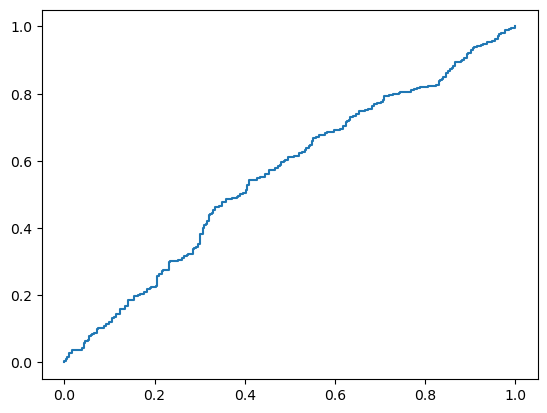

In [63]:
plt.plot(fpr, tpr)

Text(0.4, 0.4, 'AUROC score is 0.559')

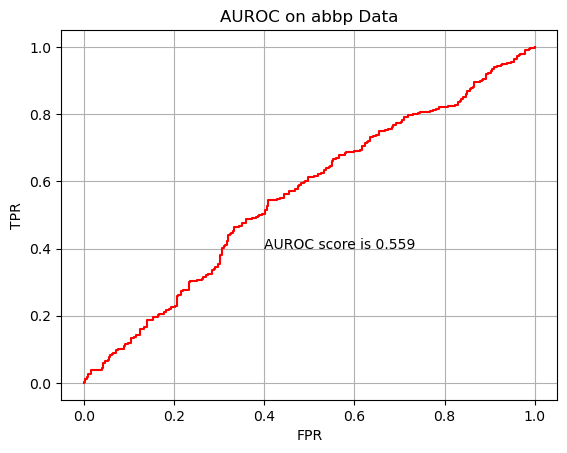

In [64]:
plt.plot(fpr, tpr, color= 'r')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('AUROC on abbp Data')
plt.grid()
plt.text(x= 0.4, y= 0.4, s='AUROC score is 0.559' )


# Decision Tree Classifier

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [65]:
dtc = DecisionTreeClassifier(criterion='gini')
dtc.fit(abbp_train_x, abbp_train_y)

DecisionTreeClassifier()

In [66]:
dtc_pred = dtc.predict(abbp_test_x)
con=confusion_matrix(abbp_test_y, dtc_pred)
con

array([[256,  50],
       [ 59, 235]], dtype=int64)

In [67]:
accuracy_score(abbp_test_y, dtc_pred)

0.8183333333333334

In [68]:
dtcE = DecisionTreeClassifier(criterion='entropy')
dtcE.fit(abbp_train_x,abbp_train_y)

DecisionTreeClassifier(criterion='entropy')

In [69]:
pred_dtc_y1 = dtcE.predict(abbp_test_x)
con1=confusion_matrix(abbp_test_y, pred_dtc_y1)
con1

array([[262,  44],
       [ 46, 248]], dtype=int64)

In [70]:
accuracy_score(abbp_test_y, pred_dtc_y1)

0.85

# feature selection

In [71]:
dtcE.feature_importances_

array([0.30072239, 0.27170223, 0.04766589, 0.03377296, 0.0675301 ,
       0.03520808, 0.03329386, 0.01135806, 0.15171743, 0.04702899])

In [72]:
fimp = pd.DataFrame({'feature':abbp_test_x.columns, 'value':dtcE.feature_importances_})
fimp.sort_values('value', ascending=False)

,feature,value
0,Level_of_Hemoglobin,0.300722
1,Genetic_Pedigree_Coefficient,0.271702
8,Chronic_kidney_disease,0.151717
4,Physical_activity,0.067530
2,Age,0.047666
9,Adrenal_and_thyroid_disorders,0.047029
5,salt_content_in_the_diet,0.035208
3,BMI,0.033773
6,alcohol_consumption_per_day,0.033294
7,Level_of_Stress,0.011358


we can drop 'Smoking','Level_of_Stress','Sex' as these columns have less importance.

# Oversampling

In [42]:
abbp.Blood_Pressure_Abnormality.value_counts()

0    1013
1     987
Name: Blood_Pressure_Abnormality, dtype: int64

In [43]:
df2 = abbp_train[abbp_train.Blood_Pressure_Abnormality==1]

In [44]:
abbp_train = pd.concat([abbp_train,df2])  #then repeat steps from splitting and check accuracy (in logistic regression model)